In [1]:
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
import nltk

In [2]:
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')
#nltk.download('stopwords')

In [3]:
tweet_df_path = '/Users/evanmcneal/Desktop/Projects/athena/data_igsn/data/tweet_df.csv'

In [4]:
tweets = pd.read_csv(tweet_df_path)

In [5]:
tweets['fav_rate'] = tweets['Num_Favorites']/tweets['Num_Followers'] * 100
tweets['retweet_rate'] = tweets['Num_Retweets']/tweets['Num_Followers'] * 100

In [6]:
tweets

,Tweet,Num_Favorites,Num_Retweets,Num_Followers,Created_At,id,fav_rate,retweet_rate
0,New York women are crushing on Andrew Cuomo: '...,146,16,1618684,2020-03-22 04:41:05,1241585667613896704,0.009020,0.000988
1,This is the scene at one of Sydney’s many nort...,1626,430,247370,2020-03-22 04:42:18,1241585976385753089,0.657315,0.173829
2,'Masked Singer' gifts Alice with photos of Cha...,1573,412,5456231,2020-03-22 04:44:51,1241586614243135496,0.028829,0.007551
3,Maddow - the woman who has peddled lies and wi...,1486,613,421490,2020-03-22 04:47:35,1241587305644724225,0.352559,0.145436
4,If any other President in recent U.S&gt; histo...,2219,628,409468,2020-03-22 04:47:35,1241587304486989825,0.541923,0.153370
...,...,...,...,...,...,...,...,...
1221,"Guardian front page, Monday 6 April 2020: Scie...",40,18,8605623,2020-04-05 21:10:24,1246908067834474497,0.000465,0.000209
1222,"Louisiana church holds services, defying coron...",45,28,21672806,2020-04-05 21:10:34,1246908111786594313,0.000208,0.000129
1223,U wey no get money today go get 2mr. Keep wor...,213,42,489955,2020-04-05 21:10:38,1246908125879435264,0.043473,0.008572
1224,Yayyy✨✨ this is the inhilation one!! Make sure...,1398,138,4257852,2020-04-05 21:10:45,1246908157668077568,0.032833,0.003241


In [7]:
def get_wordnet_pos(word):
    """
    Map POS tag to first character lemmatize() accepts
    """
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


def preprocess(tweet: str, additional_stopwords: set) -> str:
    text_clean = tweet.lower()

    # Remove non-alphabet
    text_clean = re.sub(r'[^a-zA-Z]|(\w+:\/\/\S+)',' ', text_clean).split()

    # Remove short words (length < 3)
    text_clean = [w for w in text_clean if len(w)>2]

    # Lemmatize text with the appropriate POS tag
    lemmatizer = WordNetLemmatizer()
    text_clean = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in text_clean]

    # Filter out stop words in English 
    stops = stopwords.words('english')+ additional_stopwords
    text_clean = [w for w in text_clean if w not in stops]
    
    return text_clean

In [8]:
additional_stopwords = ['amp', 'get', 'one', 'go', 'day', 'say', 'make', 'new', 'like']

In [9]:
clean_tweets = tweets.copy()
clean_tweets['Tweet'] = clean_tweets['Tweet'].apply(
    preprocess, 
    args=(additional_stopwords,)
)

In [10]:
clean_tweets

,Tweet,Num_Favorites,Num_Retweets,Num_Followers,Created_At,id,fav_rate,retweet_rate
0,"[york, woman, crush, andrew, cuomo, single]",146,16,1618684,2020-03-22 04:41:05,1241585667613896704,0.009020,0.000988
1,"[scene, sydney, many, northern, beach, right, ...",1626,430,247370,2020-03-22 04:42:18,1241585976385753089,0.657315,0.173829
2,"[masked, singer, gift, alice, photo, chan, sub...",1573,412,5456231,2020-03-22 04:44:51,1241586614243135496,0.028829,0.007551
3,"[maddow, woman, peddle, lie, wild, conspiracy,...",1486,613,421490,2020-03-22 04:47:35,1241587305644724225,0.352559,0.145436
4,"[president, recent, history, something, never,...",2219,628,409468,2020-03-22 04:47:35,1241587304486989825,0.541923,0.153370
...,...,...,...,...,...,...,...,...
1221,"[guardian, front, page, monday, april, scienti...",40,18,8605623,2020-04-05 21:10:24,1246908067834474497,0.000465,0.000209
1222,"[louisiana, church, hold, service, defy, coron...",45,28,21672806,2020-04-05 21:10:34,1246908111786594313,0.000208,0.000129
1223,"[wey, money, today, keep, work, towards, goal]",213,42,489955,2020-04-05 21:10:38,1246908125879435264,0.043473,0.008572
1224,"[yayyy, inhilation, sure, drink, hahaa]",1398,138,4257852,2020-04-05 21:10:45,1246908157668077568,0.032833,0.003241


In [11]:
from collections import Counter
tweet_list = list(clean_tweets['Tweet'])
counts = Counter(x for xs in tweet_list for x in set(xs))

In [12]:
counts.most_common(10)

[('coronavirus', 114),
 ('people', 101),
 ('need', 93),
 ('time', 86),
 ('trump', 84),
 ('covid', 77),
 ('president', 66),
 ('american', 66),
 ('work', 65),
 ('life', 64)]

In [13]:
keyword_tuples = []

for count in counts.most_common(10):
    keyword = count[0]
    
    total_favs = 0
    total_retweets = 0
    total_retweet_rate = 0.0
    total_fav_rate = 0.0
    count = 0
    
    for index, row in clean_tweets.iterrows():
        
        if keyword in row['Tweet']:
            
            total_favs += row['Num_Favorites']
            total_retweets += row['Num_Retweets']
            total_retweet_rate = total_retweet_rate + row['retweet_rate']
            total_fav_rate = total_fav_rate + row['fav_rate']
            count += 1

    avg_retweet_rate = total_retweet_rate / count
    avg_fav_rate = total_fav_rate / count
    
    keyword_tuples.append(
        (
            keyword,
            total_favs,
            total_retweets,
            avg_retweet_rate,
            avg_fav_rate,
            count
        )
    )
    
keyword_df = pd.DataFrame(
    keyword_tuples, 
    columns = [
        "keyword",
        "num_favorites", 
        "num_retweets", 
        "avg_retweet_rate",
        "avg_fav_rate",
        "count"
    ]
)

keyword_df

,keyword,num_favorites,num_retweets,avg_retweet_rate,avg_fav_rate,count
0,coronavirus,6364794,1890220,10.020887,26.565534,114
1,people,10597462,3250806,21.426652,84.880466,101
2,need,8640808,2171092,22.093884,72.236395,93
3,time,7190198,1817389,7.971605,32.756217,86
4,trump,6140251,1960564,8.164797,20.856404,84
5,covid,5282550,1462810,23.658072,70.128347,77
6,president,5017111,1144260,12.825418,56.194567,66
7,american,4900363,1295285,6.620863,20.777680,66
8,work,6156437,1387198,6.444202,17.011108,65
9,life,6509299,1367954,6.963652,19.604165,64


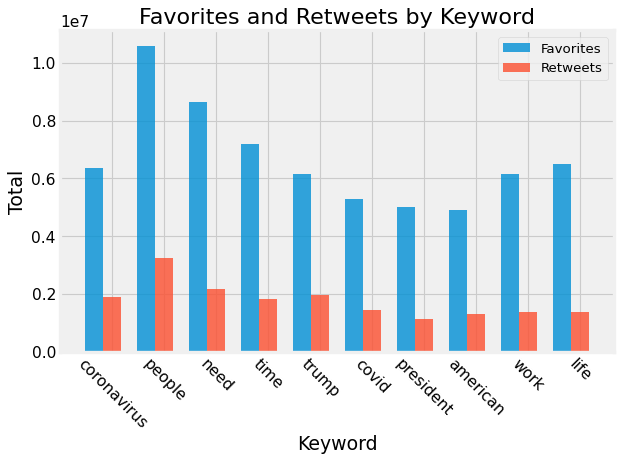

In [14]:
plt.style.use('fivethirtyeight')

# data to plot
n_groups = 10
favs = keyword_df['num_favorites']
retweets = keyword_df['num_retweets']

# create plot
fig=plt.figure(
    figsize=(8, 6), 
    dpi= 80, 
    facecolor='w', 
    edgecolor='k'
)

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(
    index, 
    favs, 
    bar_width,
    alpha=opacity,
    label='Favorites'
)

rects2 = plt.bar(
    index + bar_width, 
    retweets, 
    bar_width,
    alpha=opacity,
    label='Retweets'
)

plt.ylabel('Total', size=17)
plt.xlabel('Keyword', size=17)
plt.title('Favorites and Retweets by Keyword', size=20)
plt.xticks(index + bar_width, keyword_df['keyword'], rotation=-45)
plt.legend(prop={'size': 12})

plt.tight_layout()
plt.show()

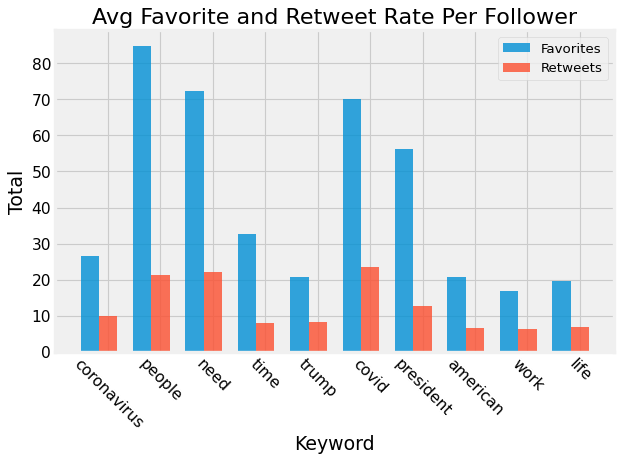

In [15]:
plt.style.use('fivethirtyeight')

# data to plot
n_groups = 10
fav_rate = keyword_df['avg_fav_rate']
retweet_rate = keyword_df['avg_retweet_rate']

# create plot
fig=plt.figure(
    figsize=(8, 6), 
    dpi= 80, 
    facecolor='w', 
    edgecolor='k'
)

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(
    index, 
    fav_rate, 
    bar_width,
    alpha=opacity,
    label='Favorites'
)

rects2 = plt.bar(
    index + bar_width, 
    retweet_rate, 
    bar_width,
    alpha=opacity,
    label='Retweets'
)

plt.ylabel('Total', size=17)
plt.xlabel('Keyword', size=17)
plt.title('Avg Favorite and Retweet Rate Per Follower', size=20)
plt.xticks(index + bar_width, keyword_df['keyword'], rotation=-45)
plt.legend(prop={'size': 12})

plt.tight_layout()
plt.show()

In [16]:
tweets[tweets['retweet_rate'] > 20]

,Tweet,Num_Favorites,Num_Retweets,Num_Followers,Created_At,id,fav_rate,retweet_rate
38,I am committing 100 cr towards fighting the Pa...,67812,16579,82092,2020-03-22 11:47:02,1241692860359102464,82.604882,20.195634
41,The H1N1 swine flu pandemic that infected up t...,410468,102687,412519,2020-03-22 12:19:24,1241701009144995840,99.502811,24.892672
58,You wasted precious months when you could've t...,173640,45490,103093,2020-03-22 16:54:08,1241770144545869826,168.430446,44.125207
59,When this is over please invite me everywhere ...,143160,54341,107203,2020-03-22 17:13:35,1241775042712780801,133.541039,50.689813
65,“If you are irresponsible enough to think that...,42253,32069,71088,2020-03-22 19:06:17,1241803403619172359,59.437598,45.111693
...,...,...,...,...,...,...,...,...
1047,My mother-in-law is an immigrant from Peru wor...,139788,16985,41025,2020-04-04 23:05:14,1246574579386105859,340.738574,41.401584
1052,The pasta is returning to its natural habitat....,68318,9861,12794,2020-04-05 02:22:43,1246624276767068162,533.984680,77.075191
1063,Y’all why Kayla in boosie live got me screamin...,94059,29430,95308,2020-04-05 05:49:33,1246676327685451779,98.689512,30.878835
1112,Massive fire in a building in my neighborhood ...,25102,14714,6935,2020-04-05 16:19:42,1246834912017010690,361.961067,212.170151


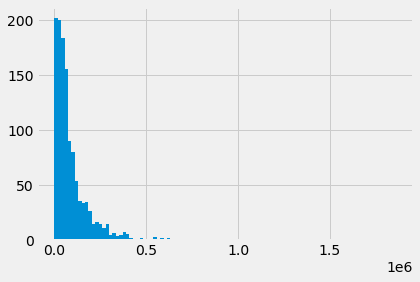

In [17]:
tweets['Num_Favorites'].hist(bins=100)

In [18]:
tweets['log(Num_Favorites)'] = np.log(tweets["Num_Favorites"])
tweets['log(Num_Retweets)'] = np.log(tweets["Num_Retweets"])

tweets['log(fav_rate)'] = np.log(tweets["fav_rate"])
tweets['log(retweet_rate)'] = np.log(tweets["retweet_rate"])

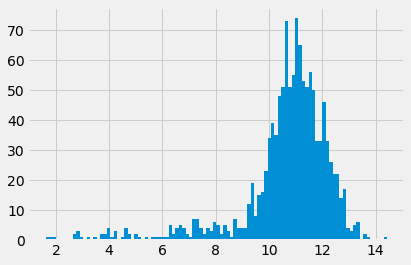

In [19]:
tweets['log(Num_Favorites)'].hist(bins=100)

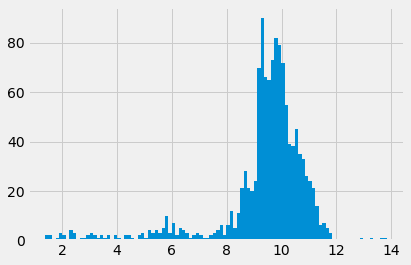

In [20]:
tweets['log(Num_Retweets)'].hist(bins=100)

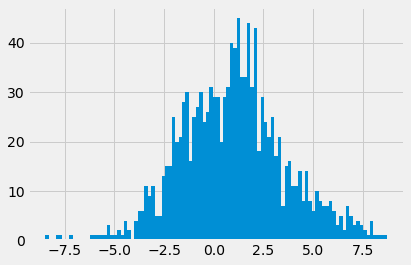

In [21]:
tweets['log(fav_rate)'].hist(bins=100)

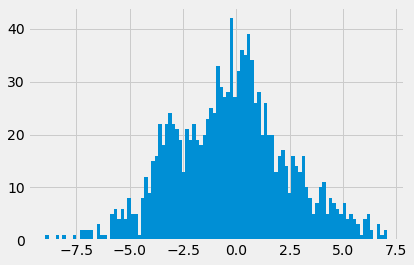

In [22]:
tweets['log(retweet_rate)'].hist(bins=100)

In [23]:
tweets.sort_values("Created_At")

,Tweet,Num_Favorites,Num_Retweets,Num_Followers,Created_At,id,fav_rate,retweet_rate,log(Num_Favorites),log(Num_Retweets),log(fav_rate),log(retweet_rate)
0,New York women are crushing on Andrew Cuomo: '...,146,16,1618684,2020-03-22 04:41:05,1241585667613896704,0.009020,0.000988,4.983607,2.772589,-4.708347,-6.919365
1,This is the scene at one of Sydney’s many nort...,1626,430,247370,2020-03-22 04:42:18,1241585976385753089,0.657315,0.173829,7.393878,6.063785,-0.419592,-1.749685
2,'Masked Singer' gifts Alice with photos of Cha...,1573,412,5456231,2020-03-22 04:44:51,1241586614243135496,0.028829,0.007551,7.360740,6.021023,-3.546359,-4.886075
3,Maddow - the woman who has peddled lies and wi...,1486,613,421490,2020-03-22 04:47:35,1241587305644724225,0.352559,0.145436,7.303843,6.418365,-1.042538,-1.928016
4,If any other President in recent U.S&gt; histo...,2219,628,409468,2020-03-22 04:47:35,1241587304486989825,0.541923,0.153370,7.704812,6.442540,-0.612632,-1.874904
...,...,...,...,...,...,...,...,...,...,...,...,...
1221,"Guardian front page, Monday 6 April 2020: Scie...",40,18,8605623,2020-04-05 21:10:24,1246908067834474497,0.000465,0.000209,3.688879,2.890372,-7.673877,-8.472384
1222,"Louisiana church holds services, defying coron...",45,28,21672806,2020-04-05 21:10:34,1246908111786594313,0.000208,0.000129,3.806662,3.332205,-8.479736,-8.954194
1223,U wey no get money today go get 2mr. Keep wor...,213,42,489955,2020-04-05 21:10:38,1246908125879435264,0.043473,0.008572,5.361292,3.737670,-3.135606,-4.759229
1224,Yayyy✨✨ this is the inhilation one!! Make sure...,1398,138,4257852,2020-04-05 21:10:45,1246908157668077568,0.032833,0.003241,7.242798,4.927254,-3.416307,-5.731851
